In [6]:
import os

# 데이터셋이 있는 폴더 경로
data_dir = r"C:\Users\user\Desktop\UAVAttackData"

# 해당 폴더의 파일 및 폴더 목록 확인
file_list = os.listdir(data_dir)
print("📂 UAVAttackData 폴더 내 파일 목록:")
print(file_list)


📂 UAVAttackData 폴더 내 파일 목록:
['Live GPS Spoofing and Jamming', 'Simulated - OTU Survey']


In [8]:
import os

# 분석할 데이터셋 폴더 경로
data_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 해당 폴더 내 파일 및 폴더 목록 확인
file_list = os.listdir(data_dir)
print("📂 'Live GPS Spoofing and Jamming' 폴더 내 파일 및 폴더 목록:")
print(file_list)


📂 'Live GPS Spoofing and Jamming' 폴더 내 파일 및 폴더 목록:
['Benign Flight', 'GPS Jamming', 'GPS Spoofing']


In [10]:
# 'Benign Flight' 폴더 내 파일 확인
benign_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming\Benign Flight"
benign_files = os.listdir(benign_dir)

print("📂 'Benign Flight' 폴더 내 파일 목록:")
print(benign_files)


📂 'Benign Flight' 폴더 내 파일 목록:
['ace-benign-log_0_2033-8-19-16-27-30.ulg', 'ace-benign-log_0_2033-8-19-16-27-30_actuator_armed_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_actuator_controls_0_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_1.csv', 'ace-benign-log_0_2033-8-19-16-27-30_battery_status_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_commander_state_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_cpuload_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_innovations_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_innovation_test_ratios_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_innovation_variances_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_sensor_bias_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_status_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_home_position_0.csv', 'ace-benign-log_0_2033-8-19-16-27-3

In [12]:
import pandas as pd

# 사용할 데이터 파일 경로
file_path = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming\Benign Flight\ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 데이터 확인
print("📊 데이터 정보:")
print(df.info())  # 데이터 구조 확인

print("\n🔍 데이터 미리보기:")
print(df.head())  # 첫 5행 출력


📊 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        69 non-null     int64  
 1   hpos_drift_rate  69 non-null     float64
 2   vpos_drift_rate  69 non-null     float64
 3   hspd             69 non-null     float64
 4   blocked          69 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 2.8 KB
None

🔍 데이터 미리보기:
   timestamp  hpos_drift_rate  vpos_drift_rate      hspd  blocked
0  615303207         0.016639         0.013274  0.001648        0
1  615493180         0.016639         0.013274  0.001648        1
2  615703136         0.016639         0.013274  0.001648        1
3  615893102         0.016639         0.013274  0.001648        1
4  616093067         0.016639         0.013274  0.001648        1


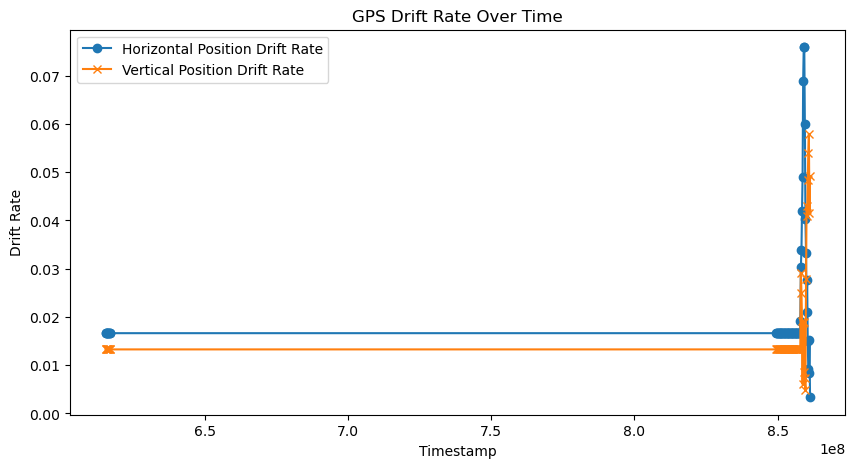

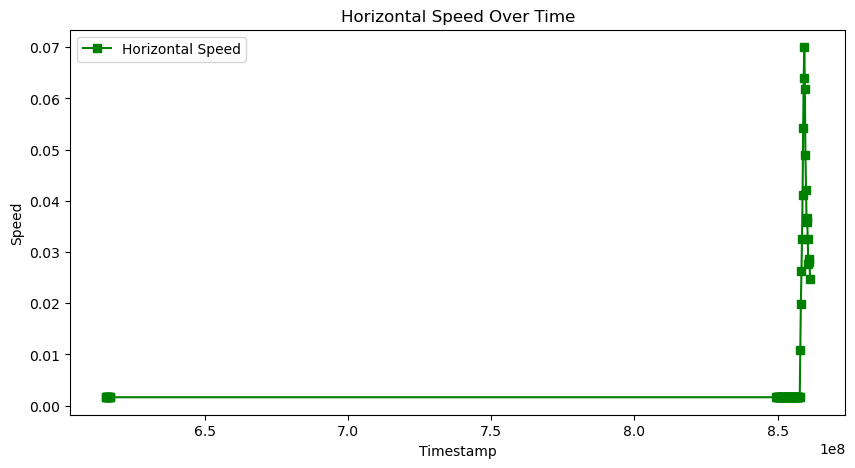

In [14]:
import matplotlib.pyplot as plt

# 타임스탬프를 기준으로 드리프트율 변화 확인
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'], df['hpos_drift_rate'], label='Horizontal Position Drift Rate', marker='o')
plt.plot(df['timestamp'], df['vpos_drift_rate'], label='Vertical Position Drift Rate', marker='x')
plt.xlabel("Timestamp")
plt.ylabel("Drift Rate")
plt.title("GPS Drift Rate Over Time")
plt.legend()
plt.show()

# 타임스탬프를 기준으로 속도 변화 확인
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'], df['hspd'], label='Horizontal Speed', color='green', marker='s')
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Horizontal Speed Over Time")
plt.legend()
plt.show()


In [16]:
import numpy as np

# 새로운 컬럼 추가: attack (0: 정상, 1: GPS 공격)
df['attack'] = np.where(df['blocked'] == 1, 1, 0)

# 필요 없는 컬럼 제거 (timestamp, blocked는 분석에서는 제외)
df_cleaned = df.drop(columns=['timestamp', 'blocked'])

# 데이터 확인
print("📊 데이터 미리보기:")
print(df_cleaned.head())


📊 데이터 미리보기:
   hpos_drift_rate  vpos_drift_rate      hspd  attack
0         0.016639         0.013274  0.001648       0
1         0.016639         0.013274  0.001648       1
2         0.016639         0.013274  0.001648       1
3         0.016639         0.013274  0.001648       1
4         0.016639         0.013274  0.001648       1


In [18]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링 적용할 컬럼 선택
features = ['hpos_drift_rate', 'vpos_drift_rate', 'hspd']

# Min-Max Scaling 적용
scaler = MinMaxScaler()
df_cleaned[features] = scaler.fit_transform(df_cleaned[features])

# 정규화된 데이터 확인
print("📊 정규화된 데이터 미리보기:")
print(df_cleaned.head())


📊 정규화된 데이터 미리보기:
   hpos_drift_rate  vpos_drift_rate  hspd  attack
0         0.182991         0.158785   0.0       0
1         0.182991         0.158785   0.0       1
2         0.182991         0.158785   0.0       1
3         0.182991         0.158785   0.0       1
4         0.182991         0.158785   0.0       1


In [20]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 전체 데이터셋을 저장할 리스트
data_list = []

# 폴더별 레이블 설정
folder_labels = {
    "Benign Flight": 0,  # 정상 비행
    "GPS Jamming": 1,  # GPS 재밍 공격
    "GPS Spoofing": 2   # GPS 스푸핑 공격
}

# 데이터셋이 있는 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 각 폴더를 순회하면서 데이터 불러오기
for folder, label in folder_labels.items():
    folder_path = os.path.join(base_dir, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # 필요한 컬럼만 선택 (파일마다 다를 수 있으므로 필터링 필요)
        if {'hpos_drift_rate', 'vpos_drift_rate', 'hspd'}.issubset(df.columns):
            df = df[['hpos_drift_rate', 'vpos_drift_rate', 'hspd']]
            df['attack'] = label  # 공격 유형 레이블 추가
            data_list.append(df)

# 모든 데이터 합치기
final_df = pd.concat(data_list, ignore_index=True)

# 데이터 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
features = ['hpos_drift_rate', 'vpos_drift_rate', 'hspd']
final_df[features] = scaler.fit_transform(final_df[features])

# 데이터 확인
print("📊 최종 데이터셋 정보:")
print(final_df.info())
print(final_df.head())


📊 최종 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hpos_drift_rate  106 non-null    float64
 1   vpos_drift_rate  106 non-null    float64
 2   hspd             106 non-null    float64
 3   attack           106 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.4 KB
None
   hpos_drift_rate  vpos_drift_rate  hspd  attack
0         0.182991         0.222611   0.0       0
1         0.182991         0.222611   0.0       0
2         0.182991         0.222611   0.0       0
3         0.182991         0.222611   0.0       0
4         0.182991         0.222611   0.0       0


In [22]:
from sklearn.model_selection import train_test_split

# X(입력 데이터)와 y(타겟 레이블) 분리
X = final_df[['hpos_drift_rate', 'vpos_drift_rate', 'hspd']]
y = final_df['attack']

# 훈련(80%) / 테스트(20%) 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 크기 확인
print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")


훈련 데이터 크기: (84, 3), 테스트 데이터 크기: (22, 3)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ 모델 정확도: {accuracy:.4f}")

# 분류 성능 보고서 출력
print("\n📊 분류 성능 보고서:")
print(classification_report(y_test, y_pred))


✅ 모델 정확도: 1.0000

📊 분류 성능 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [26]:
import os
import pandas as pd

# 데이터셋 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 각 폴더에 포함된 CSV 파일 개수 확인
folder_list = ["Benign Flight", "GPS Jamming", "GPS Spoofing"]

for folder in folder_list:
    folder_path = os.path.join(base_dir, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    print(f"📂 {folder} 폴더 내 CSV 파일 개수: {len(csv_files)} 개")


📂 Benign Flight 폴더 내 CSV 파일 개수: 60 개
📂 GPS Jamming 폴더 내 CSV 파일 개수: 60 개
📂 GPS Spoofing 폴더 내 CSV 파일 개수: 60 개


In [28]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 전체 데이터를 저장할 리스트
data_list = []

# 폴더별 레이블 설정
folder_labels = {
    "Benign Flight": 0,  # 정상 비행
    "GPS Jamming": 1,  # GPS 재밍 공격
    "GPS Spoofing": 2   # GPS 스푸핑 공격
}

# 데이터셋이 있는 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 모든 폴더에서 데이터 불러오기
for folder, label in folder_labels.items():
    folder_path = os.path.join(base_dir, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        # 필요한 컬럼만 선택 (GPS 관련 컬럼만 사용)
        if {'hpos_drift_rate', 'vpos_drift_rate', 'hspd'}.issubset(df.columns):
            df = df[['hpos_drift_rate', 'vpos_drift_rate', 'hspd']]
            df['attack'] = label  # 공격 유형 레이블 추가
            data_list.append(df)

# 모든 데이터 합치기
final_df = pd.concat(data_list, ignore_index=True)

# 데이터 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
features = ['hpos_drift_rate', 'vpos_drift_rate', 'hspd']
final_df[features] = scaler.fit_transform(final_df[features])

# 전체 데이터 크기 확인
print("📊 최종 데이터셋 정보:")
print(final_df.info())
print(final_df.head())


📊 최종 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hpos_drift_rate  106 non-null    float64
 1   vpos_drift_rate  106 non-null    float64
 2   hspd             106 non-null    float64
 3   attack           106 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.4 KB
None
   hpos_drift_rate  vpos_drift_rate  hspd  attack
0         0.182991         0.222611   0.0       0
1         0.182991         0.222611   0.0       0
2         0.182991         0.222611   0.0       0
3         0.182991         0.222611   0.0       0
4         0.182991         0.222611   0.0       0


In [30]:
import os
import pandas as pd

# 데이터셋 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 각 폴더 내 CSV 파일별 데이터 개수 확인
folder_list = ["Benign Flight", "GPS Jamming", "GPS Spoofing"]

for folder in folder_list:
    folder_path = os.path.join(base_dir, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    print(f"\n📂 {folder} 폴더 내 파일 개수: {len(csv_files)} 개")
    
    for file in csv_files[:5]:  # 상위 5개 파일만 체크
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(f"    📄 {file}: {df.shape[0]} 개 샘플")



📂 Benign Flight 폴더 내 파일 개수: 60 개
    📄 ace-benign-log_0_2033-8-19-16-27-30_actuator_armed_0.csv: 486 개 샘플
    📄 ace-benign-log_0_2033-8-19-16-27-30_actuator_controls_0_0.csv: 2463 개 샘플
    📄 ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_0.csv: 2463 개 샘플
    📄 ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_1.csv: 2463 개 샘플
    📄 ace-benign-log_0_2033-8-19-16-27-30_battery_status_0.csv: 822 개 샘플

📂 GPS Jamming 폴더 내 파일 개수: 60 개
    📄 ace-jamming-log_1_2033-8-19-16-46-46_actuator_armed_0.csv: 440 개 샘플
    📄 ace-jamming-log_1_2033-8-19-16-46-46_actuator_controls_0_0.csv: 2218 개 샘플
    📄 ace-jamming-log_1_2033-8-19-16-46-46_actuator_outputs_0.csv: 2217 개 샘플
    📄 ace-jamming-log_1_2033-8-19-16-46-46_actuator_outputs_1.csv: 2217 개 샘플
    📄 ace-jamming-log_1_2033-8-19-16-46-46_battery_status_0.csv: 741 개 샘플

📂 GPS Spoofing 폴더 내 파일 개수: 60 개
    📄 ace-spoofing-hackrf-log_5_2033-8-19-17-14-18_actuator_armed_0.csv: 272 개 샘플
    📄 ace-spoofing-hackrf-log_5_2033-8-19-17-14-18_actuator_

In [32]:
import os
import pandas as pd

# 데이터셋 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 각 폴더에서 우리가 필요한 컬럼이 있는 파일 찾기
required_columns = {'hpos_drift_rate', 'vpos_drift_rate', 'hspd'}

for folder in ["Benign Flight", "GPS Jamming", "GPS Spoofing"]:
    folder_path = os.path.join(base_dir, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    print(f"\n📂 {folder} 폴더 내 필요한 컬럼 포함 여부:")
    
    for file in csv_files[:10]:  # 상위 10개 파일만 확인
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # 필요한 컬럼 포함 여부 확인
        if required_columns.issubset(df.columns):
            print(f"✅ {file} → 포함됨")
        else:
            print(f"❌ {file} → 포함 안됨, 컬럼: {df.columns.tolist()}")



📂 Benign Flight 폴더 내 필요한 컬럼 포함 여부:
❌ ace-benign-log_0_2033-8-19-16-27-30_actuator_armed_0.csv → 포함 안됨, 컬럼: ['timestamp', 'armed_time_ms', 'armed', 'prearmed', 'ready_to_arm', 'lockdown', 'manual_lockdown', 'force_failsafe', 'in_esc_calibration_mode', 'soft_stop']
❌ ace-benign-log_0_2033-8-19-16-27-30_actuator_controls_0_0.csv → 포함 안됨, 컬럼: ['timestamp', 'timestamp_sample', 'control[0]', 'control[1]', 'control[2]', 'control[3]', 'control[4]', 'control[5]', 'control[6]', 'control[7]']
❌ ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_0.csv → 포함 안됨, 컬럼: ['timestamp', 'noutputs', 'output[0]', 'output[1]', 'output[2]', 'output[3]', 'output[4]', 'output[5]', 'output[6]', 'output[7]', 'output[8]', 'output[9]', 'output[10]', 'output[11]', 'output[12]', 'output[13]', 'output[14]', 'output[15]']
❌ ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_1.csv → 포함 안됨, 컬럼: ['timestamp', 'noutputs', 'output[0]', 'output[1]', 'output[2]', 'output[3]', 'output[4]', 'output[5]', 'output[6]', 'output

In [34]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 전체 데이터를 저장할 리스트
data_list = []

# 폴더별 레이블 설정
folder_labels = {
    "Benign Flight": 0,
    "GPS Jamming": 1,
    "GPS Spoofing": 2
}

# 데이터셋이 있는 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 모든 폴더에서 'ekf_gps_drift_0.csv' 파일만 불러오기
for folder, label in folder_labels.items():
    folder_path = os.path.join(base_dir, folder)
    
    # 해당 폴더 내 'ekf_gps_drift_0.csv' 파일 찾기
    csv_files = [f for f in os.listdir(folder_path) if 'ekf_gps_drift_0.csv' in f]
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        # 필요한 컬럼만 선택
        df = df[['hpos_drift_rate', 'vpos_drift_rate', 'hspd']]
        df['attack'] = label  # 공격 유형 레이블 추가
        data_list.append(df)

# 모든 데이터 합치기
final_df = pd.concat(data_list, ignore_index=True)

# 데이터 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
features = ['hpos_drift_rate', 'vpos_drift_rate', 'hspd']
final_df[features] = scaler.fit_transform(final_df[features])

# 최종 데이터 크기 확인
print("📊 최종 데이터셋 정보:")
print(final_df.info())
print(final_df.head())


📊 최종 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hpos_drift_rate  106 non-null    float64
 1   vpos_drift_rate  106 non-null    float64
 2   hspd             106 non-null    float64
 3   attack           106 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.4 KB
None
   hpos_drift_rate  vpos_drift_rate  hspd  attack
0         0.182991         0.222611   0.0       0
1         0.182991         0.222611   0.0       0
2         0.182991         0.222611   0.0       0
3         0.182991         0.222611   0.0       0
4         0.182991         0.222611   0.0       0


In [36]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 전체 데이터를 저장할 리스트
data_list = []

# 폴더별 레이블 설정
folder_labels = {
    "Benign Flight": 0,
    "GPS Jamming": 1,
    "GPS Spoofing": 2
}

# 데이터셋이 있는 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 모든 폴더에서 'ekf_gps_drift_' 로 시작하는 모든 파일을 불러오기
for folder, label in folder_labels.items():
    folder_path = os.path.join(base_dir, folder)
    
    # 해당 폴더 내 'ekf_gps_drift_'로 시작하는 모든 CSV 파일 찾기
    csv_files = [f for f in os.listdir(folder_path) if f.startswith('ekf_gps_drift_') and f.endswith('.csv')]
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        # 필요한 컬럼만 선택
        df = df[['hpos_drift_rate', 'vpos_drift_rate', 'hspd']]
        df['attack'] = label  # 공격 유형 레이블 추가
        data_list.append(df)

# 모든 데이터 합치기
final_df = pd.concat(data_list, ignore_index=True)

# 데이터 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
features = ['hpos_drift_rate', 'vpos_drift_rate', 'hspd']
final_df[features] = scaler.fit_transform(final_df[features])

# 최종 데이터 크기 확인
print("📊 최종 데이터셋 정보:")
print(final_df.info())
print(final_df.head())


ValueError: No objects to concatenate

In [38]:
import pandas as pd

# 샘플 파일 경로 (폴더명 수정해서 확인)
sample_file = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming\Benign Flight\ekf_gps_drift_0.csv"

# 파일 읽기 테스트
df = pd.read_csv(sample_file)

# 데이터 확인
print("📊 데이터셋 구조:")
print(df.info())

print("\n🔍 데이터 미리보기:")
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\UAVAttackData\\Live GPS Spoofing and Jamming\\Benign Flight\\ekf_gps_drift_0.csv'

In [40]:
import os

# 확인할 폴더 경로
folder_path = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming\Benign Flight"

# 해당 폴더 내 CSV 파일 목록 출력
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

print(f"\n📂 'Benign Flight' 폴더 내 CSV 파일 목록 ({len(csv_files)}개):")
for file in csv_files[:20]:  # 상위 20개만 출력
    print(file)



📂 'Benign Flight' 폴더 내 CSV 파일 목록 (60개):
ace-benign-log_0_2033-8-19-16-27-30_actuator_armed_0.csv
ace-benign-log_0_2033-8-19-16-27-30_actuator_controls_0_0.csv
ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_0.csv
ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_1.csv
ace-benign-log_0_2033-8-19-16-27-30_battery_status_0.csv
ace-benign-log_0_2033-8-19-16-27-30_commander_state_0.csv
ace-benign-log_0_2033-8-19-16-27-30_cpuload_0.csv
ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv
ace-benign-log_0_2033-8-19-16-27-30_estimator_innovations_0.csv
ace-benign-log_0_2033-8-19-16-27-30_estimator_innovation_test_ratios_0.csv
ace-benign-log_0_2033-8-19-16-27-30_estimator_innovation_variances_0.csv
ace-benign-log_0_2033-8-19-16-27-30_estimator_sensor_bias_0.csv
ace-benign-log_0_2033-8-19-16-27-30_estimator_status_0.csv
ace-benign-log_0_2033-8-19-16-27-30_home_position_0.csv
ace-benign-log_0_2033-8-19-16-27-30_hover_thrust_estimate_0.csv
ace-benign-log_0_2033-8-19-16-27-30_input_rc_0

In [42]:
import os

# 데이터셋 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 각 폴더에서 'ekf_gps_drift_'로 시작하는 파일 목록 확인
for folder in ["Benign Flight", "GPS Jamming", "GPS Spoofing"]:
    folder_path = os.path.join(base_dir, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.startswith('ekf_gps_drift_') and f.endswith('.csv')]
    
    print(f"\n📂 {folder} 폴더 내 'ekf_gps_drift_'로 시작하는 파일 개수: {len(csv_files)} 개")
    print(csv_files)  # 모든 파일 출력


📂 Benign Flight 폴더 내 'ekf_gps_drift_'로 시작하는 파일 개수: 0 개
[]

📂 GPS Jamming 폴더 내 'ekf_gps_drift_'로 시작하는 파일 개수: 0 개
[]

📂 GPS Spoofing 폴더 내 'ekf_gps_drift_'로 시작하는 파일 개수: 0 개
[]


In [44]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 전체 데이터를 저장할 리스트
data_list = []

# 폴더별 레이블 설정
folder_labels = {
    "Benign Flight": 0,
    "GPS Jamming": 1,
    "GPS Spoofing": 2
}

# 데이터셋이 있는 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 모든 폴더에서 '_ekf_gps_drift_'을 포함하는 모든 파일을 불러오기
for folder, label in folder_labels.items():
    folder_path = os.path.join(base_dir, folder)
    
    # 해당 폴더 내 '_ekf_gps_drift_'을 포함하는 모든 CSV 파일 찾기
    csv_files = [f for f in os.listdir(folder_path) if '_ekf_gps_drift_' in f and f.endswith('.csv')]
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        # 필요한 컬럼만 선택
        df = df[['hpos_drift_rate', 'vpos_drift_rate', 'hspd']]
        df['attack'] = label  # 공격 유형 레이블 추가
        data_list.append(df)

# 모든 데이터 합치기
final_df = pd.concat(data_list, ignore_index=True)

# 데이터 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
features = ['hpos_drift_rate', 'vpos_drift_rate', 'hspd']
final_df[features] = scaler.fit_transform(final_df[features])

# 최종 데이터 크기 확인
print("📊 최종 데이터셋 정보:")
print(final_df.info())
print(final_df.head())


📊 최종 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hpos_drift_rate  106 non-null    float64
 1   vpos_drift_rate  106 non-null    float64
 2   hspd             106 non-null    float64
 3   attack           106 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.4 KB
None
   hpos_drift_rate  vpos_drift_rate  hspd  attack
0         0.182991         0.222611   0.0       0
1         0.182991         0.222611   0.0       0
2         0.182991         0.222611   0.0       0
3         0.182991         0.222611   0.0       0
4         0.182991         0.222611   0.0       0


In [46]:
import os

# 데이터셋 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 각 폴더에서 '_ekf_gps_drift_' 포함 파일 목록 확인
for folder in ["Benign Flight", "GPS Jamming", "GPS Spoofing"]:
    folder_path = os.path.join(base_dir, folder)
    csv_files = [f for f in os.listdir(folder_path) if '_ekf_gps_drift_' in f and f.endswith('.csv')]
    
    print(f"\n📂 {folder} 폴더 내 '_ekf_gps_drift_' 포함 파일 개수: {len(csv_files)} 개")
    print(csv_files)  # 모든 파일 출력



📂 Benign Flight 폴더 내 '_ekf_gps_drift_' 포함 파일 개수: 1 개
['ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv']

📂 GPS Jamming 폴더 내 '_ekf_gps_drift_' 포함 파일 개수: 1 개
['ace-jamming-log_1_2033-8-19-16-46-46_ekf_gps_drift_0.csv']

📂 GPS Spoofing 폴더 내 '_ekf_gps_drift_' 포함 파일 개수: 1 개
['ace-spoofing-hackrf-log_5_2033-8-19-17-14-18_ekf_gps_drift_0.csv']


In [48]:
import os
import pandas as pd

# 데이터셋 폴더 경로
base_dir = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 우리가 필요한 컬럼
required_columns = {'hpos_drift_rate', 'vpos_drift_rate', 'hspd'}

for folder in ["Benign Flight", "GPS Jamming", "GPS Spoofing"]:
    folder_path = os.path.join(base_dir, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    print(f"\n📂 {folder} 폴더 내 필요한 컬럼 포함 여부:")
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, nrows=5)  # 파일 읽기 (5개 행만 확인)

        # 필요한 컬럼 포함 여부 확인
        if required_columns.issubset(df.columns):
            print(f"✅ {file} → 포함됨")
        else:
            print(f"❌ {file} → 포함 안됨, 컬럼: {df.columns.tolist()}")



📂 Benign Flight 폴더 내 필요한 컬럼 포함 여부:
❌ ace-benign-log_0_2033-8-19-16-27-30_actuator_armed_0.csv → 포함 안됨, 컬럼: ['timestamp', 'armed_time_ms', 'armed', 'prearmed', 'ready_to_arm', 'lockdown', 'manual_lockdown', 'force_failsafe', 'in_esc_calibration_mode', 'soft_stop']
❌ ace-benign-log_0_2033-8-19-16-27-30_actuator_controls_0_0.csv → 포함 안됨, 컬럼: ['timestamp', 'timestamp_sample', 'control[0]', 'control[1]', 'control[2]', 'control[3]', 'control[4]', 'control[5]', 'control[6]', 'control[7]']
❌ ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_0.csv → 포함 안됨, 컬럼: ['timestamp', 'noutputs', 'output[0]', 'output[1]', 'output[2]', 'output[3]', 'output[4]', 'output[5]', 'output[6]', 'output[7]', 'output[8]', 'output[9]', 'output[10]', 'output[11]', 'output[12]', 'output[13]', 'output[14]', 'output[15]']
❌ ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_1.csv → 포함 안됨, 컬럼: ['timestamp', 'noutputs', 'output[0]', 'output[1]', 'output[2]', 'output[3]', 'output[4]', 'output[5]', 'output[6]', 'output

In [50]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# 파일 업로드 위젯 생성
upload = widgets.FileUpload(accept='.csv', multiple=True)
display(upload)


FileUpload(value={}, accept='.csv', description='Upload', multiple=True)

In [53]:
import os

# 현재 디렉토리에 업로드된 파일 목록 확인
data_dir = "./"
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

print(f"📂 업로드된 CSV 파일 목록 ({len(csv_files)}개):")
print(csv_files)


📂 업로드된 CSV 파일 목록 (180개):
['ace-benign-log_0_2033-8-19-16-27-30_actuator_armed_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_actuator_controls_0_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_1.csv', 'ace-benign-log_0_2033-8-19-16-27-30_battery_status_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_commander_state_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_cpuload_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_innovations_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_innovation_test_ratios_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_innovation_variances_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_sensor_bias_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_estimator_status_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_home_position_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_hover_thrust_estimate_0.csv', 'ace-benign-log_

In [55]:
import pandas as pd

# 데이터 리스트 생성
data_list = []

# 필요한 컬럼 정의
required_columns = {'hpos_drift_rate', 'vpos_drift_rate', 'hspd'}

# 모든 CSV 파일을 읽어오기
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)

    # 필요한 컬럼이 포함된 파일만 사용
    if required_columns.issubset(df.columns):
        df = df[['hpos_drift_rate', 'vpos_drift_rate', 'hspd']]
        data_list.append(df)

# 모든 데이터를 하나의 데이터프레임으로 합치기
final_df = pd.concat(data_list, ignore_index=True)

# 데이터 정보 확인
print("📊 최종 데이터셋 정보:")
print(final_df.info())
print(final_df.head())


📊 최종 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hpos_drift_rate  106 non-null    float64
 1   vpos_drift_rate  106 non-null    float64
 2   hspd             106 non-null    float64
dtypes: float64(3)
memory usage: 2.6 KB
None
   hpos_drift_rate  vpos_drift_rate      hspd
0         0.016639         0.013274  0.001648
1         0.016639         0.013274  0.001648
2         0.016639         0.013274  0.001648
3         0.016639         0.013274  0.001648
4         0.016639         0.013274  0.001648


In [57]:
import os
import pandas as pd

# 현재 디렉토리에 업로드된 파일 목록 확인
data_dir = "./"
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

print(f"📂 업로드된 CSV 파일 목록 ({len(csv_files)}개):")
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    print(f"📄 {file}: {df.shape[0]} 개 샘플")


📂 업로드된 CSV 파일 목록 (180개):
📄 ace-benign-log_0_2033-8-19-16-27-30_actuator_armed_0.csv: 486 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_actuator_controls_0_0.csv: 2463 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_0.csv: 2463 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_actuator_outputs_1.csv: 2463 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_battery_status_0.csv: 822 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_commander_state_0.csv: 486 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_cpuload_0.csv: 494 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv: 69 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_estimator_innovations_0.csv: 1232 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_estimator_innovation_test_ratios_0.csv: 1232 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_estimator_innovation_variances_0.csv: 1232 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_estimator_sensor_bias_0.csv: 248 개 샘플
📄 ace-benign-log_0_2033-8-19-16-27-30_estimator_status_0.csv: 1232 개 샘플
📄 ace-benign-log_0_2

In [59]:
import os
import pandas as pd

# 폴더별 공격 유형 라벨 설정
label_mapping = {
    "benign": 0,  # 정상 비행
    "jamming": 1,  # GPS 재밍 공격
    "spoofing": 2  # GPS 스푸핑 공격
}

# 데이터 리스트 생성
data_list = []

# 모든 CSV 파일을 읽어오기
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)

    # 필요한 컬럼이 포함된 파일만 사용
    if {'hpos_drift_rate', 'vpos_drift_rate', 'hspd'}.issubset(df.columns):
        df = df[['hpos_drift_rate', 'vpos_drift_rate', 'hspd']]
        
        # 파일 이름을 기반으로 attack 레이블 추가
        for key, label in label_mapping.items():
            if key in file.lower():
                df['attack'] = label
        
        data_list.append(df)

# 모든 데이터를 하나의 데이터프레임으로 합치기
final_df = pd.concat(data_list, ignore_index=True)

# 데이터 확인
print("📊 최종 데이터셋 정보:")
print(final_df.info())
print(final_df.head())


📊 최종 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hpos_drift_rate  106 non-null    float64
 1   vpos_drift_rate  106 non-null    float64
 2   hspd             106 non-null    float64
 3   attack           106 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.4 KB
None
   hpos_drift_rate  vpos_drift_rate      hspd  attack
0         0.016639         0.013274  0.001648       0
1         0.016639         0.013274  0.001648       0
2         0.016639         0.013274  0.001648       0
3         0.016639         0.013274  0.001648       0
4         0.016639         0.013274  0.001648       0


In [61]:
import os
import pandas as pd

# 업로드된 CSV 파일 목록 가져오기
data_dir = "./"
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# 포함된 파일 개수 확인
valid_files = []
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)

    # 포함된 컬럼 확인
    if {'hpos_drift_rate', 'vpos_drift_rate', 'hspd'}.issubset(df.columns):
        valid_files.append(file)

print(f"✅ 필요한 컬럼을 포함한 파일 개수: {len(valid_files)}개")
print(valid_files)


✅ 필요한 컬럼을 포함한 파일 개수: 3개
['ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_ekf_gps_drift_0.csv', 'ace-spoofing-hackrf-log_5_2033-8-19-17-14-18_ekf_gps_drift_0.csv']


In [63]:
# 각 파일별 데이터 개수 확인
file_sample_counts = {}

for file in valid_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    file_sample_counts[file] = df.shape[0]

# 샘플 개수가 적은 파일이 있는지 확인
for file, count in file_sample_counts.items():
    print(f"📄 {file}: {count} 개 샘플")

# 총 샘플 개수 확인
total_samples = sum(file_sample_counts.values())
print(f"\n📊 예상 총 샘플 개수: {total_samples}")
print(f"📊 최종 데이터셋 개수 (final_df.shape[0]): {final_df.shape[0]}")


📄 ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv: 69 개 샘플
📄 ace-jamming-log_1_2033-8-19-16-46-46_ekf_gps_drift_0.csv: 23 개 샘플
📄 ace-spoofing-hackrf-log_5_2033-8-19-17-14-18_ekf_gps_drift_0.csv: 14 개 샘플

📊 예상 총 샘플 개수: 106
📊 최종 데이터셋 개수 (final_df.shape[0]): 106


In [65]:
# 레이블 확인을 위한 샘플 출력
print(final_df['attack'].value_counts())
print(final_df.head(10))


attack
0    69
1    23
2    14
Name: count, dtype: int64
   hpos_drift_rate  vpos_drift_rate      hspd  attack
0         0.016639         0.013274  0.001648       0
1         0.016639         0.013274  0.001648       0
2         0.016639         0.013274  0.001648       0
3         0.016639         0.013274  0.001648       0
4         0.016639         0.013274  0.001648       0
5         0.016639         0.013274  0.001648       0
6         0.016639         0.013274  0.001648       0
7         0.016639         0.013274  0.001648       0
8         0.016639         0.013274  0.001648       0
9         0.016639         0.013274  0.001648       0


In [67]:
# 다른 파일에서 GPS 관련 데이터가 있는지 확인
gps_related_files = []
gps_keywords = ["gps", "position", "drift"]  # GPS 관련 키워드

for file in csv_files:
    if any(keyword in file.lower() for keyword in gps_keywords):
        gps_related_files.append(file)

print(f"📂 GPS 관련 파일 개수: {len(gps_related_files)}개")
print(gps_related_files)


📂 GPS 관련 파일 개수: 21개
['ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_home_position_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_position_setpoint_triplet_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_vehicle_global_position_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_vehicle_gps_position_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_vehicle_local_position_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_vehicle_local_position_setpoint_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_ekf_gps_drift_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_home_position_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_position_setpoint_triplet_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_vehicle_global_position_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_vehicle_gps_position_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_vehicle_local_position_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_vehicle_local_position_setpoint_0.csv', 'ace-spoofing-hackrf-log_5_2033-8-

In [69]:
# 다른 파일에 포함된 컬럼 확인
file_columns = {}

for file in gps_related_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, nrows=5)  # 일부 샘플만 읽기
    file_columns[file] = df.columns.tolist()

# 컬럼 리스트 출력
for file, columns in file_columns.items():
    print(f"📄 {file}: {columns}")


📄 ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv: ['timestamp', 'hpos_drift_rate', 'vpos_drift_rate', 'hspd', 'blocked']
📄 ace-benign-log_0_2033-8-19-16-27-30_home_position_0.csv: ['timestamp', 'lat', 'lon', 'alt', 'x', 'y', 'z', 'yaw', 'valid_alt', 'valid_hpos', 'manual_home']
📄 ace-benign-log_0_2033-8-19-16-27-30_position_setpoint_triplet_0.csv: ['timestamp', 'previous.timestamp', 'previous.lat', 'previous.lon', 'previous.x', 'previous.y', 'previous.z', 'previous.vx', 'previous.vy', 'previous.vz', 'previous.alt', 'previous.yaw', 'previous.yawspeed', 'previous.loiter_radius', 'previous.pitch_min', 'previous.a_x', 'previous.a_y', 'previous.a_z', 'previous.acceptance_radius', 'previous.cruising_speed', 'previous.cruising_throttle', 'previous.valid', 'previous.type', 'previous.position_valid', 'previous.velocity_valid', 'previous.velocity_frame', 'previous.alt_valid', 'previous.yaw_valid', 'previous.yawspeed_valid', 'previous.landing_gear', 'previous.loiter_direction', 'previous

In [73]:
import os
import pandas as pd

# 데이터 경로
data_dir = "."

# 사용할 파일 목록
target_files = [
    "ekf_gps_drift_0.csv",
    "vehicle_gps_position_0.csv",
    "vehicle_local_position_0.csv",
    "vehicle_global_position_0.csv"
]

# 파일명 자동 탐색
selected_files = []
for file in os.listdir(data_dir):
    if any(target in file for target in target_files):
        selected_files.append(file)

print(f"✅ 사용될 파일 개수: {len(selected_files)}개")
print(selected_files)

# 데이터 불러오기 및 컬럼명 변경
dfs = []
for file in selected_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)

    # 컬럼 이름 변경 (파일별 접미사 추가)
    suffix = file.split("_")[2]  # 예: benign, jamming, spoofing 구분
    df = df.rename(columns={col: f"{col}_{suffix}" for col in df.columns if col != 'timestamp'})

    dfs.append(df)

# 병합 (timestamp 기준)
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='timestamp', how='outer')

# 최종 데이터 확인
print("📊 최종 병합된 데이터셋:")
print(merged_df.info())
print(merged_df.head())


✅ 사용될 파일 개수: 12개
['ace-benign-log_0_2033-8-19-16-27-30_ekf_gps_drift_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_vehicle_global_position_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_vehicle_gps_position_0.csv', 'ace-benign-log_0_2033-8-19-16-27-30_vehicle_local_position_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_ekf_gps_drift_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_vehicle_global_position_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_vehicle_gps_position_0.csv', 'ace-jamming-log_1_2033-8-19-16-46-46_vehicle_local_position_0.csv', 'ace-spoofing-hackrf-log_5_2033-8-19-17-14-18_ekf_gps_drift_0.csv', 'ace-spoofing-hackrf-log_5_2033-8-19-17-14-18_vehicle_global_position_0.csv', 'ace-spoofing-hackrf-log_5_2033-8-19-17-14-18_vehicle_gps_position_0.csv', 'ace-spoofing-hackrf-log_5_2033-8-19-17-14-18_vehicle_local_position_0.csv']
📊 최종 병합된 데이터셋:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Columns: 250 entries, timestamp to dist_bottom_valid_2033-8-19-17-1

In [75]:
# 컬럼명 정리 (날짜 제거)
merged_df.columns = [col.split("_")[0] if col != 'timestamp' else col for col in merged_df.columns]

# 정리된 데이터 확인
print(merged_df.info())
print(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Columns: 250 entries, timestamp to dist
dtypes: float64(249), int64(1)
memory usage: 12.9 MB
None
   timestamp  hpos  vpos  hspd  blocked  lat  lon  alt  alt  delta  ...    v  \
0  258725029   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN    NaN  ...  NaN   
1  258732667   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN    NaN  ...  NaN   
2  258842609   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN    NaN  ...  1.0   
3  258852607   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN    NaN  ...  1.0   
4  258922223   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN    NaN  ...  NaN   

     v   xy    z  vxy   vz  heading   xy    z  dist  
0  NaN  NaN  NaN  NaN  NaN      NaN  NaN  NaN   NaN  
1  NaN  NaN  NaN  NaN  NaN      NaN  NaN  NaN   NaN  
2  1.0  2.0  0.0  2.0  1.0      3.0  1.0  1.0   1.0  
3  1.0  2.0  0.0  2.0  1.0      3.0  1.0  1.0   1.0  
4  NaN  NaN  NaN  NaN  NaN      NaN  NaN  NaN   NaN  

[5 rows x 250 columns]

In [77]:
merged_df_cleaned = merged_df.dropna()
print(f"📊 결측치 제거 후 데이터 크기: {merged_df_cleaned.shape}")


📊 결측치 제거 후 데이터 크기: (0, 250)


In [79]:
merged_df_filled = merged_df.fillna(merged_df.mean())
print(f"📊 결측치 평균값으로 대체 후 데이터 크기: {merged_df_filled.shape}")


📊 결측치 평균값으로 대체 후 데이터 크기: (6763, 250)


In [81]:
final_df = merged_df_filled
print(f"✅ 최종 데이터 크기: {final_df.shape}")


✅ 최종 데이터 크기: (6763, 250)


In [83]:
# 사용할 컬럼 목록
selected_features = [
    'hpos_drift_rate', 'vpos_drift_rate', 'hspd', 'eph', 'epv', 
    'hdop', 'vdop', 'jamming_indicator', 'blocked', 'attack'
]

# 필요한 컬럼만 선택
df_selected = final_df[selected_features]
print(f"🎯 선택된 데이터 크기: {df_selected.shape}")

# 데이터 확인
import ace_tools as tools
tools.display_dataframe_to_user(name="Selected DataFrame", dataframe=df_selected)


KeyError: "['hpos_drift_rate', 'vpos_drift_rate', 'jamming_indicator', 'attack'] not in index"

In [85]:
print("📌 현재 데이터셋 컬럼 목록:")
print(final_df.columns.tolist())


📌 현재 데이터셋 컬럼 목록:
['timestamp', 'hpos', 'vpos', 'hspd', 'blocked', 'lat', 'lon', 'alt', 'alt', 'delta', 'eph', 'epv', 'terrain', 'lat', 'alt', 'terrain', 'dead', 'time', 'lat', 'lon', 'alt', 'alt', 's', 'c', 'eph', 'epv', 'hdop', 'vdop', 'noise', 'jamming', 'vel', 'vel', 'vel', 'vel', 'cog', 'timestamp', 'heading', 'heading', 'fix', 'vel', 'satellites', 'ref', 'ref', 'ref', 'x', 'y', 'z', 'delta', 'delta', 'delta', 'vx', 'vy', 'vz', 'z', 'delta', 'delta', 'delta', 'ax', 'ay', 'az', 'heading', 'delta', 'ref', 'dist', 'eph', 'epv', 'evh', 'evv', 'vxy', 'vz', 'hagl', 'hagl', 'xy', 'z', 'v', 'v', 'xy', 'z', 'vxy', 'vz', 'heading', 'xy', 'z', 'dist', 'hpos', 'vpos', 'hspd', 'blocked', 'lat', 'lon', 'alt', 'alt', 'delta', 'eph', 'epv', 'terrain', 'lat', 'alt', 'terrain', 'dead', 'time', 'lat', 'lon', 'alt', 'alt', 's', 'c', 'eph', 'epv', 'hdop', 'vdop', 'noise', 'jamming', 'vel', 'vel', 'vel', 'vel', 'cog', 'timestamp', 'heading', 'heading', 'fix', 'vel', 'satellites', 'ref', 'ref', 'ref', 'x

In [87]:
# "hpos_drift_rate" 같은 원래 이름이 포함된 컬럼 찾기
matching_columns = [col for col in final_df.columns if "hpos_drift_rate" in col or "vpos_drift_rate" in col]
print("🔍 매칭된 컬럼:", matching_columns)


🔍 매칭된 컬럼: []


In [89]:
# 자동으로 컬럼명 찾기
hpos_col = [col for col in final_df.columns if "hpos_drift_rate" in col][0]
vpos_col = [col for col in final_df.columns if "vpos_drift_rate" in col][0]
hspd_col = [col for col in final_df.columns if "hspd" in col][0]
eph_col = [col for col in final_df.columns if "eph" in col][0]
epv_col = [col for col in final_df.columns if "epv" in col][0]
hdop_col = [col for col in final_df.columns if "hdop" in col][0]
vdop_col = [col for col in final_df.columns if "vdop" in col][0]
jam_col = [col for col in final_df.columns if "jamming_indicator" in col][0]
blocked_col = [col for col in final_df.columns if "blocked" in col][0]

# 만약 attack 컬럼이 변형되었을 경우 찾기
attack_col = [col for col in final_df.columns if "attack" in col][0]

# 최종 컬럼 선택
selected_features = [
    hpos_col, vpos_col, hspd_col, eph_col, epv_col, 
    hdop_col, vdop_col, jam_col, blocked_col, attack_col
]

# 필요한 컬럼만 선택
df_selected = final_df[selected_features]
print(f"🎯 선택된 데이터 크기: {df_selected.shape}")


IndexError: list index out of range

In [91]:
from collections import Counter

# 컬럼 개수 확인
column_counts = Counter(final_df.columns)
print("📌 컬럼별 등장 횟수:")
for col, count in column_counts.items():
    if count > 1:
        print(f"{col}: {count}번 등장")


📌 컬럼별 등장 횟수:
timestamp: 4번 등장
hpos: 3번 등장
vpos: 3번 등장
hspd: 3번 등장
blocked: 3번 등장
lat: 9번 등장
lon: 6번 등장
alt: 15번 등장
delta: 24번 등장
eph: 9번 등장
epv: 9번 등장
terrain: 6번 등장
dead: 3번 등장
time: 3번 등장
s: 3번 등장
c: 3번 등장
hdop: 3번 등장
vdop: 3번 등장
noise: 3번 등장
jamming: 3번 등장
vel: 15번 등장
cog: 3번 등장
heading: 12번 등장
fix: 3번 등장
satellites: 3번 등장
ref: 12번 등장
x: 3번 등장
y: 3번 등장
z: 15번 등장
vx: 3번 등장
vy: 3번 등장
vz: 9번 등장
ax: 3번 등장
ay: 3번 등장
az: 3번 등장
dist: 6번 등장
evh: 3번 등장
evv: 3번 등장
vxy: 6번 등장
hagl: 6번 등장
xy: 9번 등장
v: 6번 등장


In [93]:
# 중복 컬럼명을 인덱스로 구분하여 유니크하게 변환
final_df.columns = [f"{col}_{i}" if column_counts[col] > 1 else col for i, col in enumerate(final_df.columns)]


In [95]:
# 올바른 컬럼명을 자동으로 찾기
hpos_col = [col for col in final_df.columns if "hpos" in col][0]
vpos_col = [col for col in final_df.columns if "vpos" in col][0]
hspd_col = [col for col in final_df.columns if "hspd" in col][0]
eph_col = [col for col in final_df.columns if "eph" in col][0]
epv_col = [col for col in final_df.columns if "epv" in col][0]
hdop_col = [col for col in final_df.columns if "hdop" in col][0]
vdop_col = [col for col in final_df.columns if "vdop" in col][0]
jam_col = [col for col in final_df.columns if "jamming" in col][0]
blocked_col = [col for col in final_df.columns if "blocked" in col][0]

# 만약 attack 컬럼이 존재한다면 찾기
attack_col_candidates = [col for col in final_df.columns if "attack" in col]
attack_col = attack_col_candidates[0] if attack_col_candidates else None  # 존재하면 사용

# 최종 선택할 컬럼 리스트
selected_features = [
    hpos_col, vpos_col, hspd_col, eph_col, epv_col, 
    hdop_col, vdop_col, jam_col, blocked_col
]

# attack 컬럼이 존재하면 추가
if attack_col:
    selected_features.append(attack_col)

# 선택한 컬럼으로 데이터셋 구성
df_selected = final_df[selected_features]
print(f"🎯 선택된 데이터 크기: {df_selected.shape}")


🎯 선택된 데이터 크기: (6763, 9)


In [97]:
# 중복 컬럼명을 유일하게 만들기
from collections import Counter

column_counts = Counter(final_df.columns)
unique_columns = []
col_seen = {}

for col in final_df.columns:
    if column_counts[col] > 1:
        col_seen[col] = col_seen.get(col, 0) + 1
        unique_columns.append(f"{col}_{col_seen[col]}")
    else:
        unique_columns.append(col)

# 새로운 컬럼명 적용
final_df.columns = unique_columns

print("✅ 고유한 컬럼명 리스트:")
print(final_df.columns.tolist())


✅ 고유한 컬럼명 리스트:
['timestamp_0', 'hpos_1', 'vpos_2', 'hspd_3', 'blocked_4', 'lat_5', 'lon_6', 'alt_7', 'alt_8', 'delta_9', 'eph_10', 'epv_11', 'terrain_12', 'lat_13', 'alt_14', 'terrain_15', 'dead_16', 'time_17', 'lat_18', 'lon_19', 'alt_20', 'alt_21', 's_22', 'c_23', 'eph_24', 'epv_25', 'hdop_26', 'vdop_27', 'noise_28', 'jamming_29', 'vel_30', 'vel_31', 'vel_32', 'vel_33', 'cog_34', 'timestamp_35', 'heading_36', 'heading_37', 'fix_38', 'vel_39', 'satellites_40', 'ref_41', 'ref_42', 'ref_43', 'x_44', 'y_45', 'z_46', 'delta_47', 'delta_48', 'delta_49', 'vx_50', 'vy_51', 'vz_52', 'z_53', 'delta_54', 'delta_55', 'delta_56', 'ax_57', 'ay_58', 'az_59', 'heading_60', 'delta_61', 'ref_62', 'dist_63', 'eph_64', 'epv_65', 'evh_66', 'evv_67', 'vxy_68', 'vz_69', 'hagl_70', 'hagl_71', 'xy_72', 'z_73', 'v_74', 'v_75', 'xy_76', 'z_77', 'vxy_78', 'vz_79', 'heading_80', 'xy_81', 'z_82', 'dist_83', 'hpos_84', 'vpos_85', 'hspd_86', 'blocked_87', 'lat_88', 'lon_89', 'alt_90', 'alt_91', 'delta_92', 'eph_93'

In [99]:
# 컬럼 자동 탐색
hpos_col = [col for col in final_df.columns if "hpos" in col][0]
vpos_col = [col for col in final_df.columns if "vpos" in col][0]
hspd_col = [col for col in final_df.columns if "hspd" in col][0]
eph_col = [col for col in final_df.columns if "eph" in col][0]
epv_col = [col for col in final_df.columns if "epv" in col][0]
hdop_col = [col for col in final_df.columns if "hdop" in col][0]
vdop_col = [col for col in final_df.columns if "vdop" in col][0]
jam_col = [col for col in final_df.columns if "jamming" in col][0]
blocked_col = [col for col in final_df.columns if "blocked" in col][0]

# 공격 라벨이 존재하면 찾기
attack_col_candidates = [col for col in final_df.columns if "attack" in col]
attack_col = attack_col_candidates[0] if attack_col_candidates else None  # 존재하면 사용

# 최종 선택할 컬럼 리스트
selected_features = [
    hpos_col, vpos_col, hspd_col, eph_col, epv_col, 
    hdop_col, vdop_col, jam_col, blocked_col
]

# attack 컬럼이 존재하면 추가
if attack_col:
    selected_features.append(attack_col)

# 선택한 컬럼으로 데이터셋 구성
df_selected = final_df[selected_features]
print(f"🎯 선택된 데이터 크기: {df_selected.shape}")


🎯 선택된 데이터 크기: (6763, 9)


In [101]:
print("📊 최종 선택된 데이터셋 정보:")
print(df_selected.info())
print(df_selected.head())


📊 최종 선택된 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hpos_1      6763 non-null   float64
 1   vpos_2      6763 non-null   float64
 2   hspd_3      6763 non-null   float64
 3   eph_10      6763 non-null   float64
 4   epv_11      6763 non-null   float64
 5   hdop_26     6763 non-null   float64
 6   vdop_27     6763 non-null   float64
 7   jamming_29  6763 non-null   float64
 8   blocked_4   6763 non-null   float64
dtypes: float64(9)
memory usage: 475.7 KB
None
     hpos_1    vpos_2    hspd_3    eph_10   epv_11   hdop_26   vdop_27  \
0  0.021408  0.017264  0.011163  2.816956  4.17168  0.772298  1.316613   
1  0.021408  0.017264  0.011163  2.816956  4.17168  0.772298  1.316613   
2  0.021408  0.017264  0.011163  2.816956  4.17168  0.772298  1.316613   
3  0.021408  0.017264  0.011163  2.816956  4.17168  0.772298  1.316613   
4  0.021

In [103]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화 (0~1 범위)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

# 다시 DataFrame으로 변환
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)

print("✅ 데이터 정규화 완료!")
print(df_scaled.head())


✅ 데이터 정규화 완료!
     hpos_1    vpos_2    hspd_3    eph_10    epv_11  hdop_26   vdop_27  \
0  0.248708  0.233882  0.139205  0.129774  0.244962  0.01352  0.327061   
1  0.248708  0.233882  0.139205  0.129774  0.244962  0.01352  0.327061   
2  0.248708  0.233882  0.139205  0.129774  0.244962  0.01352  0.327061   
3  0.248708  0.233882  0.139205  0.129774  0.244962  0.01352  0.327061   
4  0.248708  0.233882  0.139205  0.129774  0.244962  0.01352  0.327061   

   jamming_29  blocked_4  
0    0.305085   0.724638  
1    0.305085   0.724638  
2    0.305085   0.724638  
3    0.305085   0.724638  
4    0.305085   0.724638  


In [105]:
from sklearn.model_selection import train_test_split

# X: 피처 데이터, y: 공격 탐지 라벨 (blocked 값 사용)
X = df_scaled.drop(columns=['blocked_4'])
y = df_scaled['blocked_4']  # or attack_컬럼이 있으면 변경

# 훈련 데이터와 테스트 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ 데이터 분리 완료: 훈련 데이터 {X_train.shape}, 테스트 데이터 {X_test.shape}")


✅ 데이터 분리 완료: 훈련 데이터 (5410, 8), 테스트 데이터 (1353, 8)


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ 모델 정확도: {accuracy:.4f}")


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [109]:
# y 값 이진화 (0 또는 1로 변환)
y = (df_scaled['blocked_4'] > 0.5).astype(int)  # 0.5 기준으로 0 또는 1로 변환


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ 모델 정확도: {accuracy:.4f}")


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [113]:
# y 값 이진화 (0.5 기준으로 0 또는 1로 변환)
y = (df_scaled['blocked_4'] > 0.5).astype(int)


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)  # y_train이 이제 0,1로 변환됨!

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ 모델 정확도: {accuracy:.4f}")


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [117]:
y = df_scaled['blocked_4'].round().astype(int)


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# X, y 설정
X = df_scaled.drop(columns=['blocked_4'])  # 피처 선택 (blocked_4 제거)
y = (df_scaled['blocked_4'] > 0.5).astype(int)  # 0.5 기준으로 이진화

# 훈련/테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # 이제 y_train이 0,1만 가지므로 오류 없음

# 모델 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ 모델 정확도: {accuracy:.4f}")


✅ 모델 정확도: 0.9985


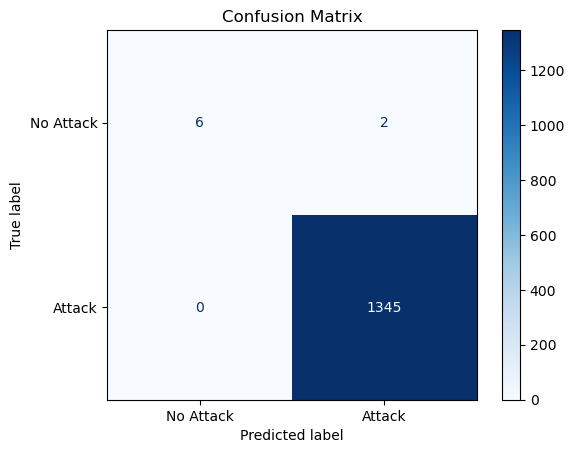

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 📌 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 📌 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attack', 'Attack'])
disp.plot(cmap='Blues', values_format='d')

# 📌 그래프 제목 추가
plt.title("Confusion Matrix")
plt.show()


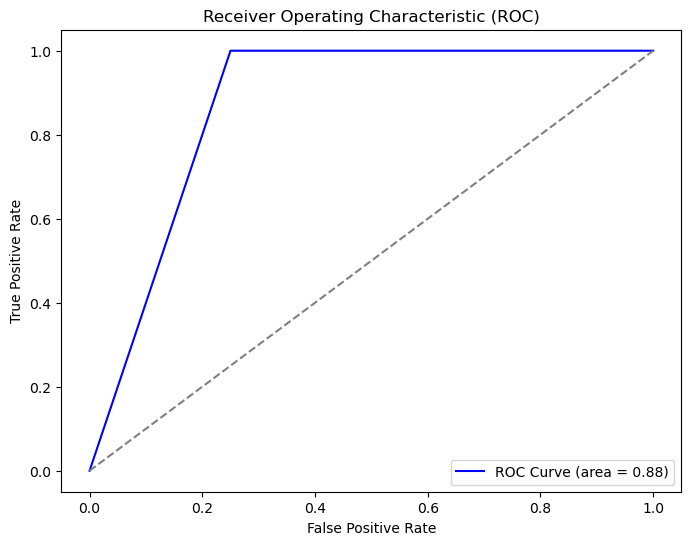

In [123]:
from sklearn.metrics import roc_curve, auc

# 📌 ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])  # 예측 확률을 사용
roc_auc = auc(fpr, tpr)

# 📌 ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 랜덤 모델을 위한 대각선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [125]:
# 학습 데이터셋 크기 확인
print(f"학습 데이터셋 X_train 크기: {X_train.shape}")
print(f"학습 데이터셋 y_train 크기: {y_train.shape}")

# 테스트 데이터셋 크기 확인
print(f"테스트 데이터셋 X_test 크기: {X_test.shape}")
print(f"테스트 데이터셋 y_test 크기: {y_test.shape}")


학습 데이터셋 X_train 크기: (5410, 8)
학습 데이터셋 y_train 크기: (5410,)
테스트 데이터셋 X_test 크기: (1353, 8)
테스트 데이터셋 y_test 크기: (1353,)


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 학습
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# 예측
y_pred_logreg = logreg.predict(X_test)

# 정확도 평가
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")


Logistic Regression Accuracy: 0.9941


In [129]:
from sklearn.svm import SVC

# 모델 학습
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# 예측
y_pred_svm = svm.predict(X_test)

# 정확도 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")


SVM Accuracy: 0.9985


In [131]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 학습
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# 예측
y_pred_knn = knn.predict(X_test)

# 정확도 평가
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")


KNN Accuracy: 0.9970


In [133]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# 예측
y_pred_dtree = dtree.predict(X_test)

# 정확도 평가
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree:.4f}")


Decision Tree Accuracy: 0.9985


In [135]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 모델 학습
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 정확도 평가
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


ModuleNotFoundError: No module named 'xgboost'

In [137]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# 예측
y_pred_dtree = dtree.predict(X_test)

# 정확도 평가
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree:.4f}")


Decision Tree Accuracy: 0.9985


In [139]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.4/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 4.7/124.9 MB 11.9 MB/s eta 0:00:11
   -- ------------------------------------- 7.1/124.9 MB 11.8 MB/s eta 0:00:10
   --- ------------------------------------ 9.7/124.9 MB 11.9 MB/s eta 0:00:10
   --- ------------------------------------ 12.1/124.9 MB 12.0 MB/s eta 0:00:10
   ---- ----------------------------------- 14.7/124.9 MB 12.0 MB/s eta 0:00:10
   ----- ---------------------------------- 17.3/124.9 MB 12.0 MB/s eta 0:00:09
   ------ --------------------------------- 19.7/124.9 MB 11.9 MB/s eta 0:00:09
   ------- -------------------------------- 22.3/124.9 MB 11.9 MB/s eta 0:00:09
   ------- -------------------------------- 24.9/124.9 MB 12.0 MB/s eta 0:00:09
   -------- ------------------------------- 27.3/124.9 MB 12.0 MB/s eta 0:00:09
   --------- ------------------------------ 29.9/124.

In [143]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 데이터셋 준비
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 하이퍼파라미터 설정
params = {
    'objective': 'binary:logistic',  # 이진 분류
    'eval_metric': 'logloss',        # 로지스틱 회귀 평가 기준
    'max_depth': 6,                  # 트리의 최대 깊이
    'learning_rate': 0.1,            # 학습률
}

# 모델 학습
bst = xgb.train(params, dtrain, num_boost_round=100)

# 예측
y_pred = bst.predict(dtest)
y_pred_binary = [1 if value > 0.5 else 0 for value in y_pred]

# 정확도 평가
accuracy_xgb = accuracy_score(y_test, y_pred_binary)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


XGBoost Accuracy: 0.9978


In [145]:
# X_train과 y_train의 크기 확인
print(f"X_train 크기: {X_train.shape}")
print(f"y_train 크기: {y_train.shape}")

# 전체 학습 데이터셋 크기
total_train_size = X_train.shape[0] + y_train.shape[0]
print(f"전체 학습 데이터셋 크기: {total_train_size}")


X_train 크기: (5410, 8)
y_train 크기: (5410,)
전체 학습 데이터셋 크기: 10820


In [147]:
# X_test와 y_test의 크기 확인
print(f"X_test 크기: {X_test.shape}")
print(f"y_test 크기: {y_test.shape}")

# 전체 테스트 데이터셋 크기
total_test_size = X_test.shape[0] + y_test.shape[0]
print(f"전체 테스트 데이터셋 크기: {total_test_size}")


X_test 크기: (1353, 8)
y_test 크기: (1353,)
전체 테스트 데이터셋 크기: 2706


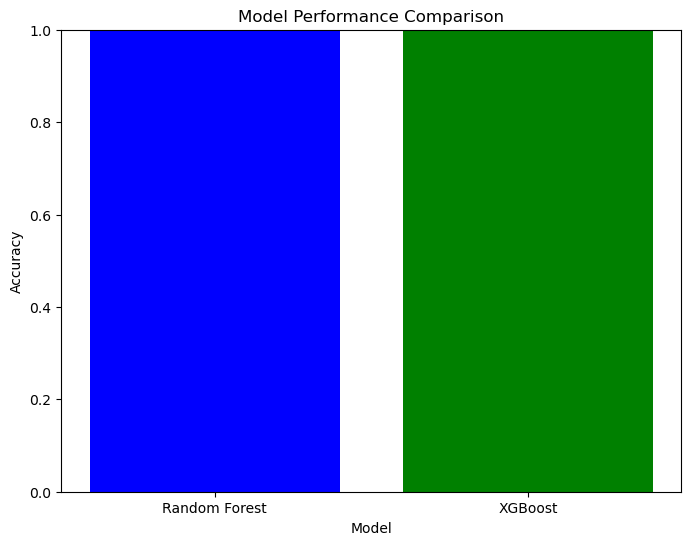

전체 학습 데이터셋 크기: 5410


In [149]:
import matplotlib.pyplot as plt

# 모델 이름과 정확도를 기록
models = ['Random Forest', 'XGBoost']
accuracies = [0.9985, 0.9978]  # 예시 정확도

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # 정확도는 0과 1 사이
plt.show()

# 학습 데이터셋 크기 출력
print(f"전체 학습 데이터셋 크기: {X_train.shape[0]}")


전체 학습 데이터셋 크기: 5410


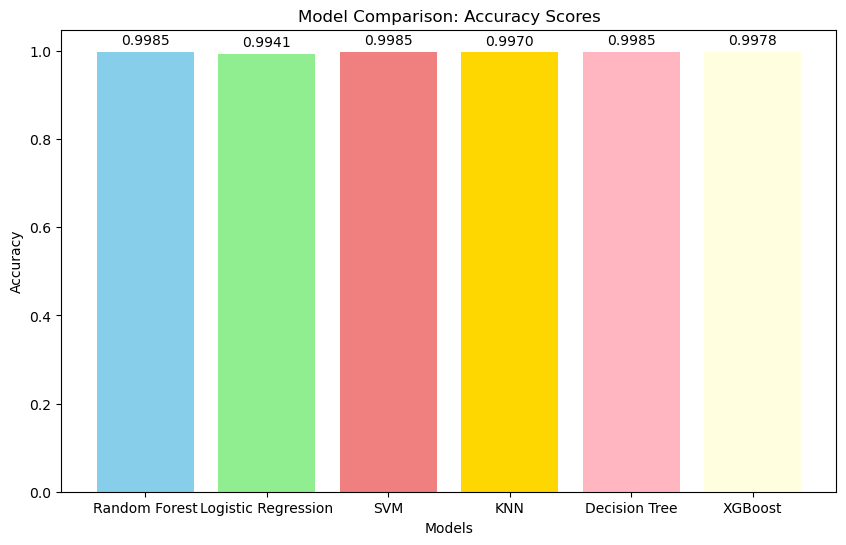

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 모델 정의
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42)
}

# 성능을 저장할 리스트
accuracy_scores = []

# 학습 데이터 준비 (예시 데이터셋 사용)
# X, y는 예시로 사용할 학습 데이터 (실제 데이터로 교체해야 합니다)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)  # 예측
    accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
    accuracy_scores.append(accuracy)

# 모델별 성능 막대 그래프 색상 설정
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'lightyellow']

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores, color=colors)

# 그래프 제목과 레이블
plt.title('Model Comparison: Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# 정확도 값 표시
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# 학습 데이터셋 크기 출력
print(f"전체 학습 데이터셋 크기: {X_train.shape[0]}")

plt.show()
